# Decision Trees, Random Forest

Data 100, Summer 2023

In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(21)

## Linear Classification

In [3]:
iris_data = pd.read_csv("data/iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
44,5.1,3.8,1.9,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
95,5.7,3.0,4.2,1.2,versicolor


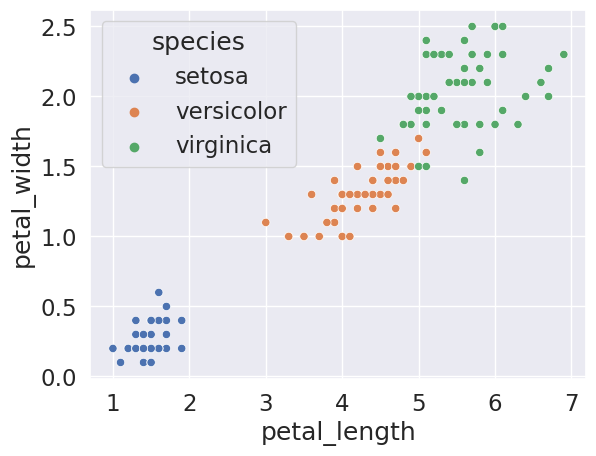

In [4]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

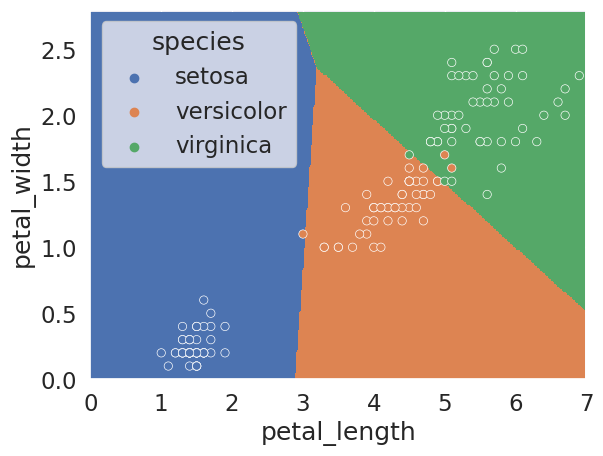

In [6]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7);
plt.ylim(0, 2.8);

In [7]:
iris_data[["petal_length", "petal_width"]]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
logistic_regression_model.predict([[1.4, 0.2]])

array(['setosa'], dtype=object)

## Decision Tree Classification

In [9]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [10]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,versicolor
29,4.7,3.2,1.6,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor
16,5.4,3.9,1.3,0.4,setosa


In [11]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['versicolor', 'setosa', 'versicolor', 'setosa'], dtype=object)

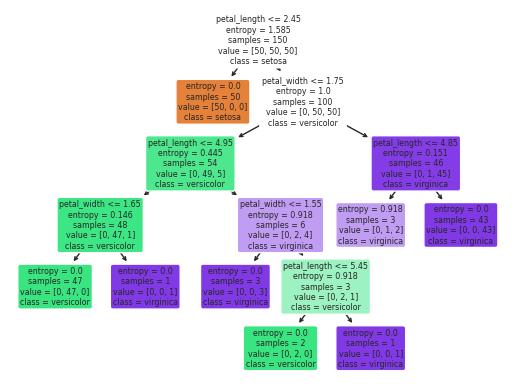

In [12]:
tree.plot_tree(decision_tree_model, feature_names = ["petal_length", "petal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True);

In [13]:
# import graphviz
# dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
#                       feature_names=["petal_length", "petal_width"],  
#                       class_names=["setosa", "versicolor", "virginica"],  
#                       filled=True, rounded=True)  
# graph = graphviz.Source(dot_data)
# graph.render(format="png", filename="iris_tree")
# graph

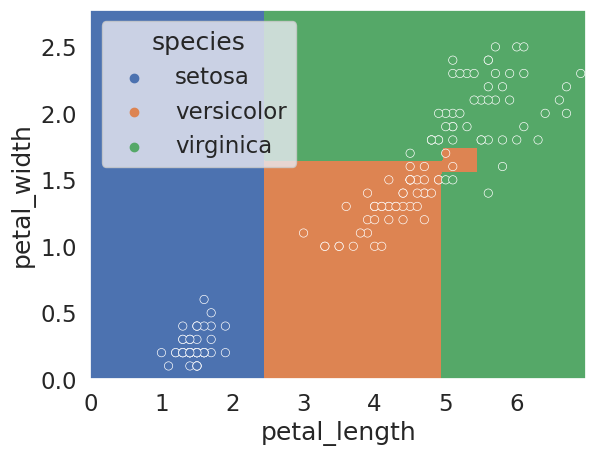

In [14]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");

In [15]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [16]:
iris_data[(iris_data["petal_length"]> 2.45)&(iris_data["petal_width"]> 1.75)&(iris_data["petal_length"]<=4.85)]

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

Instead of the `petal` measurements, let's use the `sepal` measurements to train the decision tree.

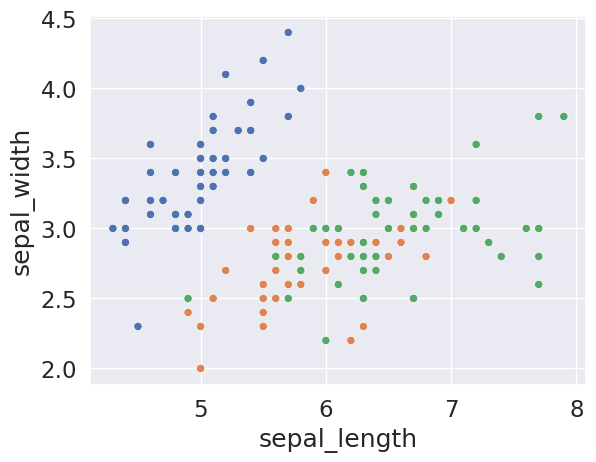

In [17]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);

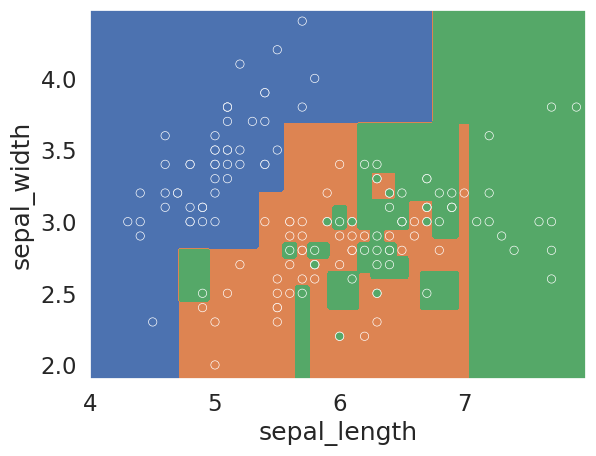

In [18]:
sepal_decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
sepal_decision_tree_model = decision_tree_model.fit(iris_data[["sepal_length", "sepal_width"]], iris_data["species"])
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_all_150_points.png", dpi=300, bbox_inches = "tight")

Let's split the dataset into a training set with 110 observations, and a test set with 40 observations.

In [19]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [20]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [21]:
len(train_iris_data)

110

In [22]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
30,4.8,3.1,1.6,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


We use the training data to fit our old model (using the `petal` measurements):

In [23]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

Decision boundary on the training data:

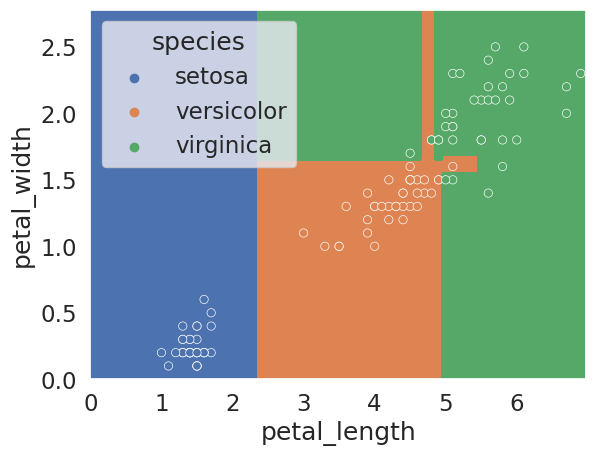

In [24]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species");

Decision boundary and the test data

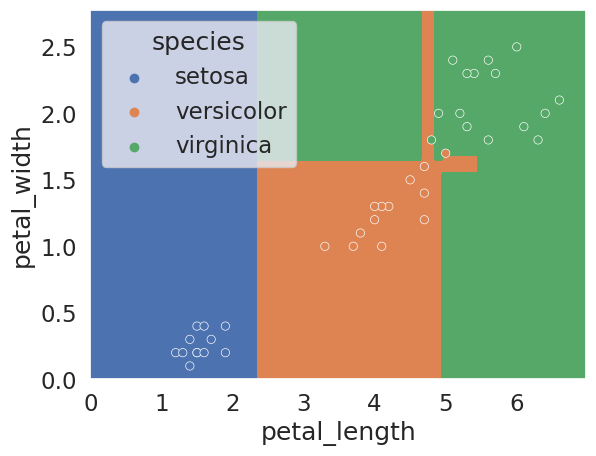

In [25]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species");

Accuracy on the traning data:

In [26]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

0.990909090909091

Accuracy on the test data:

In [27]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.95

Let's now use the `sepal` measurements to train the decision trees.

In [28]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

Decision boundary and training data:

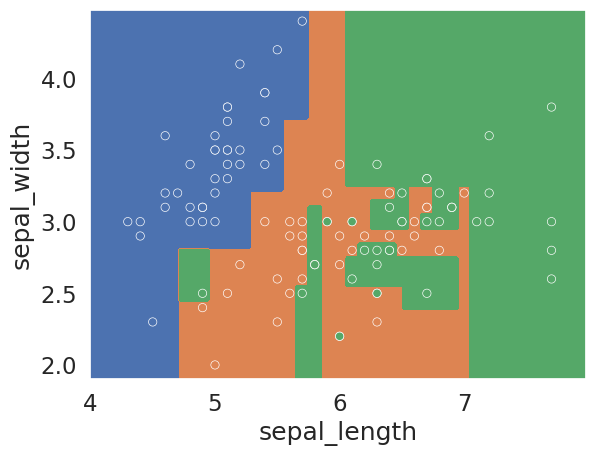

In [29]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);

Decision boundary and test data:

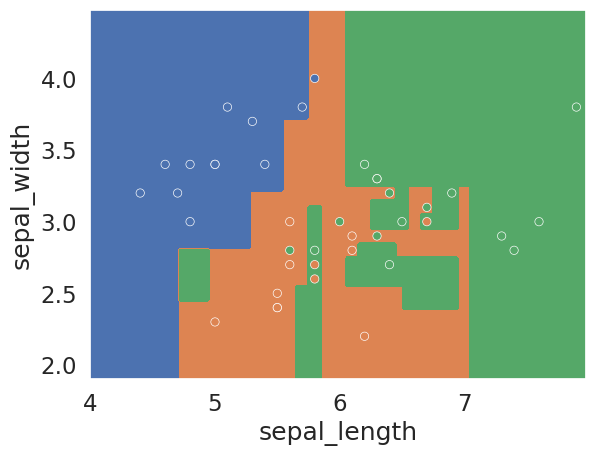

In [30]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);

In [31]:
# dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
#                       feature_names=["sepal_length", "sepal_width"],  
#                       class_names=["setosa", "versicolor", "virginica"],  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph.render(format="png", filename="sepal_tree")
# #graph

Accuracy on the training data:

In [32]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

0.9454545454545454

Accuracy on the test data:

In [33]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])

0.75

</br></br>

Naturally, we can include even more features. For example, if we want to use the `petal` AND `sepal` measurements, we simply train the decision tree on all four columns of the data. 

In [34]:
decision_tree_model_4d = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [35]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [36]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.975

In [37]:
# dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
#                       feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
#                       class_names=["setosa", "versicolor", "virginica"],  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph

### Random Forests

In [38]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier(criterion="entropy")
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [39]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False);

    if disable_axes:
        plt.axis("off")
#    if disable_axes:
#        
#        plt.gca().xaxis.label.set_visible(False)
#        plt.gca().yaxis.label.set_visible(False)        

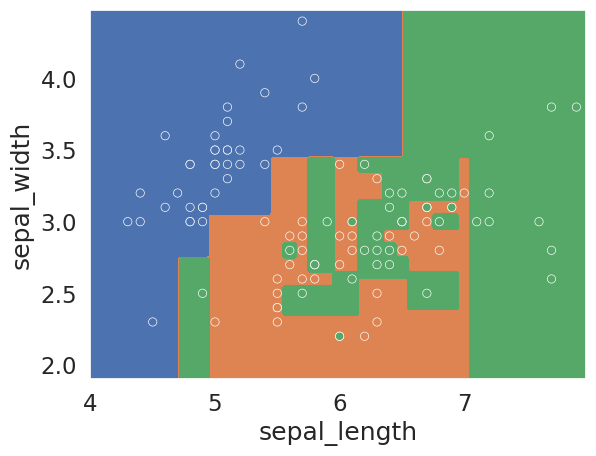

In [40]:
m_num = 0
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])

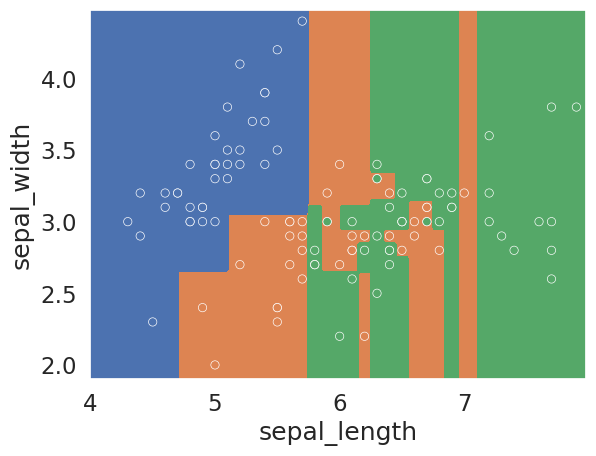

In [41]:
m_num = 7
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])

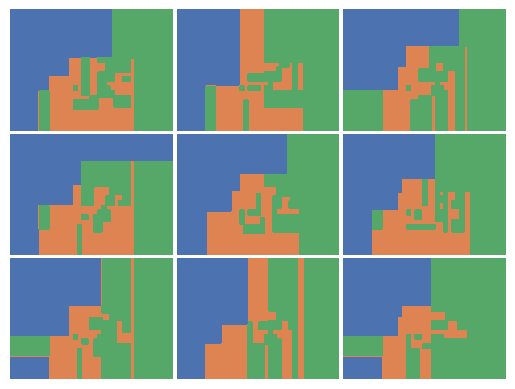

In [42]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)    